<a href="https://colab.research.google.com/github/mivaniv23/Data-Mining-Project-2025/blob/main/DataMining_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

**Abstract:** This project analyzes tennis match data to predict the winner based on player ranks, points, odds, and other match features.

**Student Name:** Markiian Ivaniv

# Imports

In [1]:
# Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# AutoViz
!pip install autoviz
from autoviz.AutoViz_Class import AutoViz_Class

# PyCaret
!pip install pycaret
from pycaret.classification import *

# Warnings
import warnings
warnings.filterwarnings('ignore')

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


# Input Data

In [2]:
url = "https://raw.githubusercontent.com/mivaniv23/Data-Mining-Project-2025/refs/heads/main/atp_tennis.csv"
df = pd.read_csv(url)
df.head()

,Tournament,Date,Series,Court,Surface,Round,Best of,Player_1,Player_2,Winner,Rank_1,Rank_2,Pts_1,Pts_2,Odd_1,Odd_2,Score
0,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Dosedel S.,Ljubicic I.,Dosedel S.,63,77,-1,-1,-1.0,-1.0,6-4 6-2
1,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Clement A.,Enqvist T.,Enqvist T.,56,5,-1,-1,-1.0,-1.0,3-6 3-6
2,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Escude N.,Baccanello P.,Escude N.,40,655,-1,-1,-1.0,-1.0,6-7 7-5 6-3
3,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Knippschild J.,Federer R.,Federer R.,87,65,-1,-1,-1.0,-1.0,1-6 4-6
4,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Fromberg R.,Woodbridge T.,Fromberg R.,81,198,-1,-1,-1.0,-1.0,7-6 5-7 6-4


# Explore Data

In [3]:
# Summary statistics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64951 entries, 0 to 64950
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tournament  64951 non-null  object 
 1   Date        64951 non-null  object 
 2   Series      64951 non-null  object 
 3   Court       64951 non-null  object 
 4   Surface     64951 non-null  object 
 5   Round       64951 non-null  object 
 6   Best of     64951 non-null  int64  
 7   Player_1    64951 non-null  object 
 8   Player_2    64951 non-null  object 
 9   Winner      64951 non-null  object 
 10  Rank_1      64951 non-null  int64  
 11  Rank_2      64951 non-null  int64  
 12  Pts_1       64951 non-null  int64  
 13  Pts_2       64951 non-null  int64  
 14  Odd_1       64951 non-null  float64
 15  Odd_2       64951 non-null  float64
 16  Score       64951 non-null  object 
dtypes: float64(2), int64(5), object(10)
memory usage: 8.4+ MB


In [4]:
# Statistical summary
df.describe()

,Best of,Rank_1,Rank_2,Pts_1,Pts_2,Odd_1,Odd_2
count,64951.000000,64951.000000,64951.000000,64951.000000,64951.000000,64951.000000,64951.000000
mean,3.376407,75.954427,75.619836,1118.519592,1124.167665,2.407988,2.405661
std,0.781755,100.869461,101.117307,1712.076178,1736.989773,2.658833,2.640178
min,3.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,3.000000,24.000000,25.000000,78.000000,76.000000,1.330000,1.330000
50%,3.000000,53.000000,54.000000,691.000000,690.000000,1.730000,1.800000
75%,3.000000,92.000000,92.000000,1230.000000,1235.000000,2.750000,2.750000
max,5.000000,3390.000000,4915.000000,16950.000000,16950.000000,67.000000,51.000000


In [5]:
# Analysis of Nulls
df.isnull().sum()

,0
Tournament,0
Date,0
Series,0
Court,0
Surface,0
Round,0
Best of,0
Player_1,0
Player_2,0
Winner,0


Shape of your Data Set loaded: (64951, 17)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  2
    Number of Integer-Categorical Columns =  4
    Number of String-Categorical Columns =  3
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  1
    Number of Numeric-Boolean Columns =  1
    Number of Discrete String Columns =  1
    Number of NLP String Columns =  5
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    17 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
To fix these data quality issues in the dataset, import FixDQ from autoviz...
    All variab

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
Tournament,object,0.000000,0,,,Possible high cardinality column with 265 unique values: Use hash encoding or text embedding to reduce dimension.
Date,object,0.000000,9,,,No issue
Series,object,0.000000,0,,,1 rare categories: ['Masters Cup']. Group them into a single category or drop the categories.
Court,object,0.000000,0,,,No issue
Surface,object,0.000000,0,,,No issue
Round,object,0.000000,0,,,1 rare categories: ['Round Robin']. Group them into a single category or drop the categories.
Best of,int64,0.000000,0,3.000000,5.000000,No issue
Player_1,object,0.000000,2,,,No issue
Player_2,object,0.000000,2,,,No issue
Winner,object,0.000000,1,,,No issue


Number of All Scatter Plots = 3


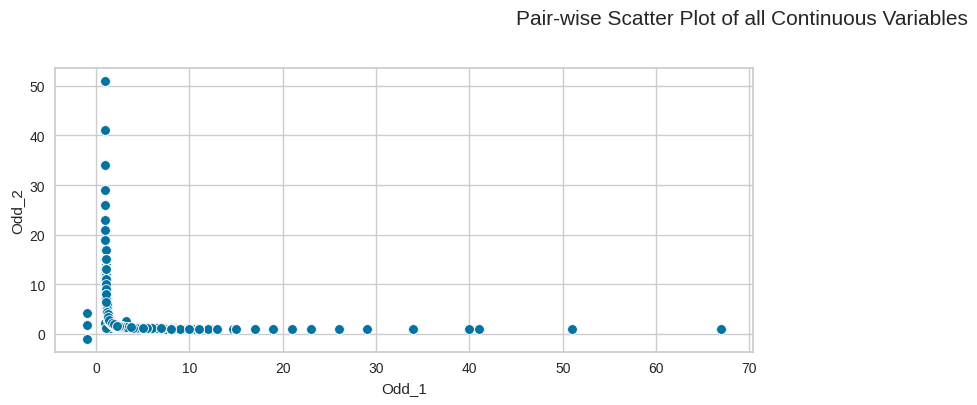

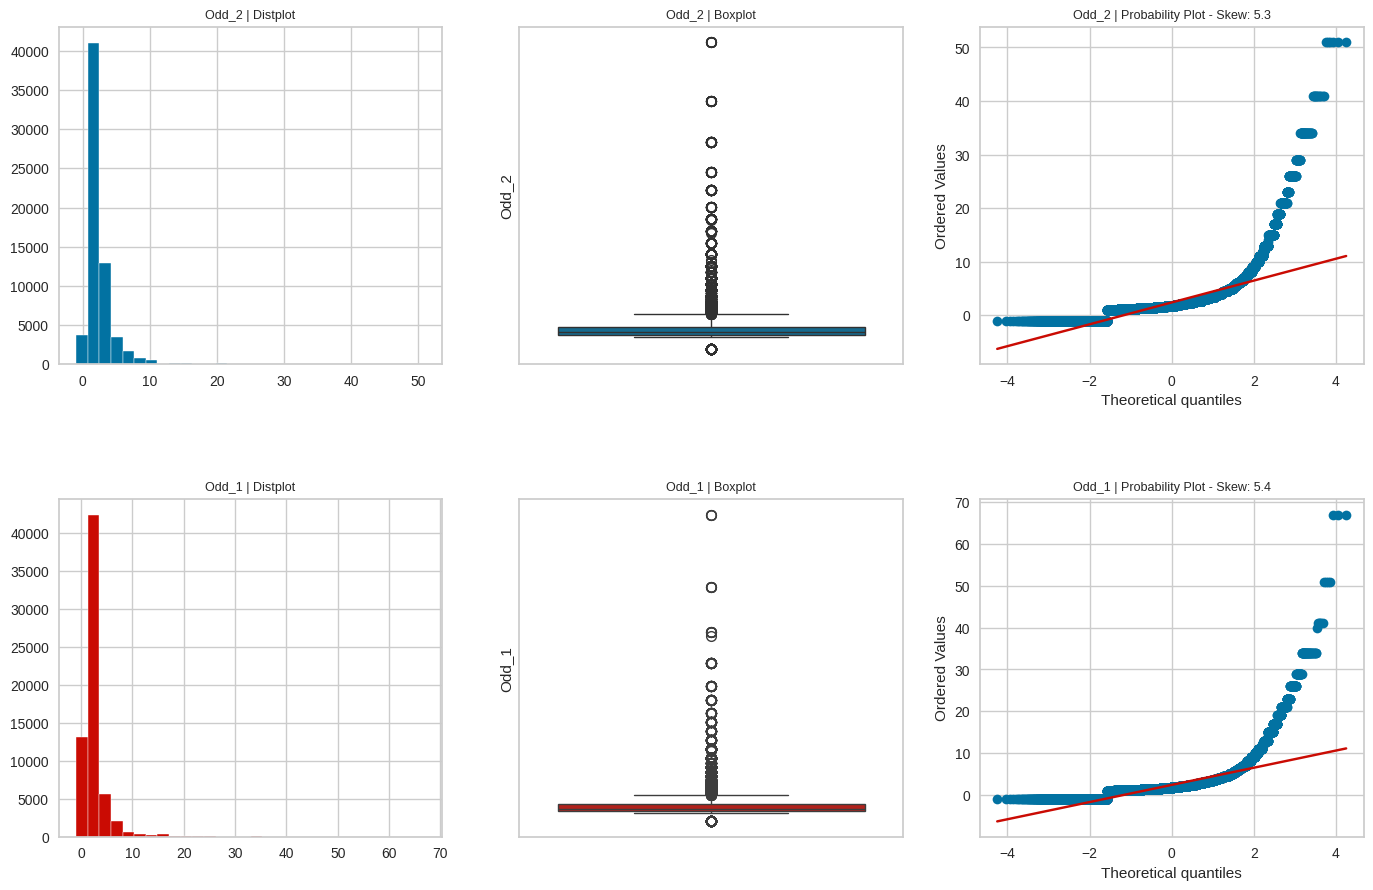

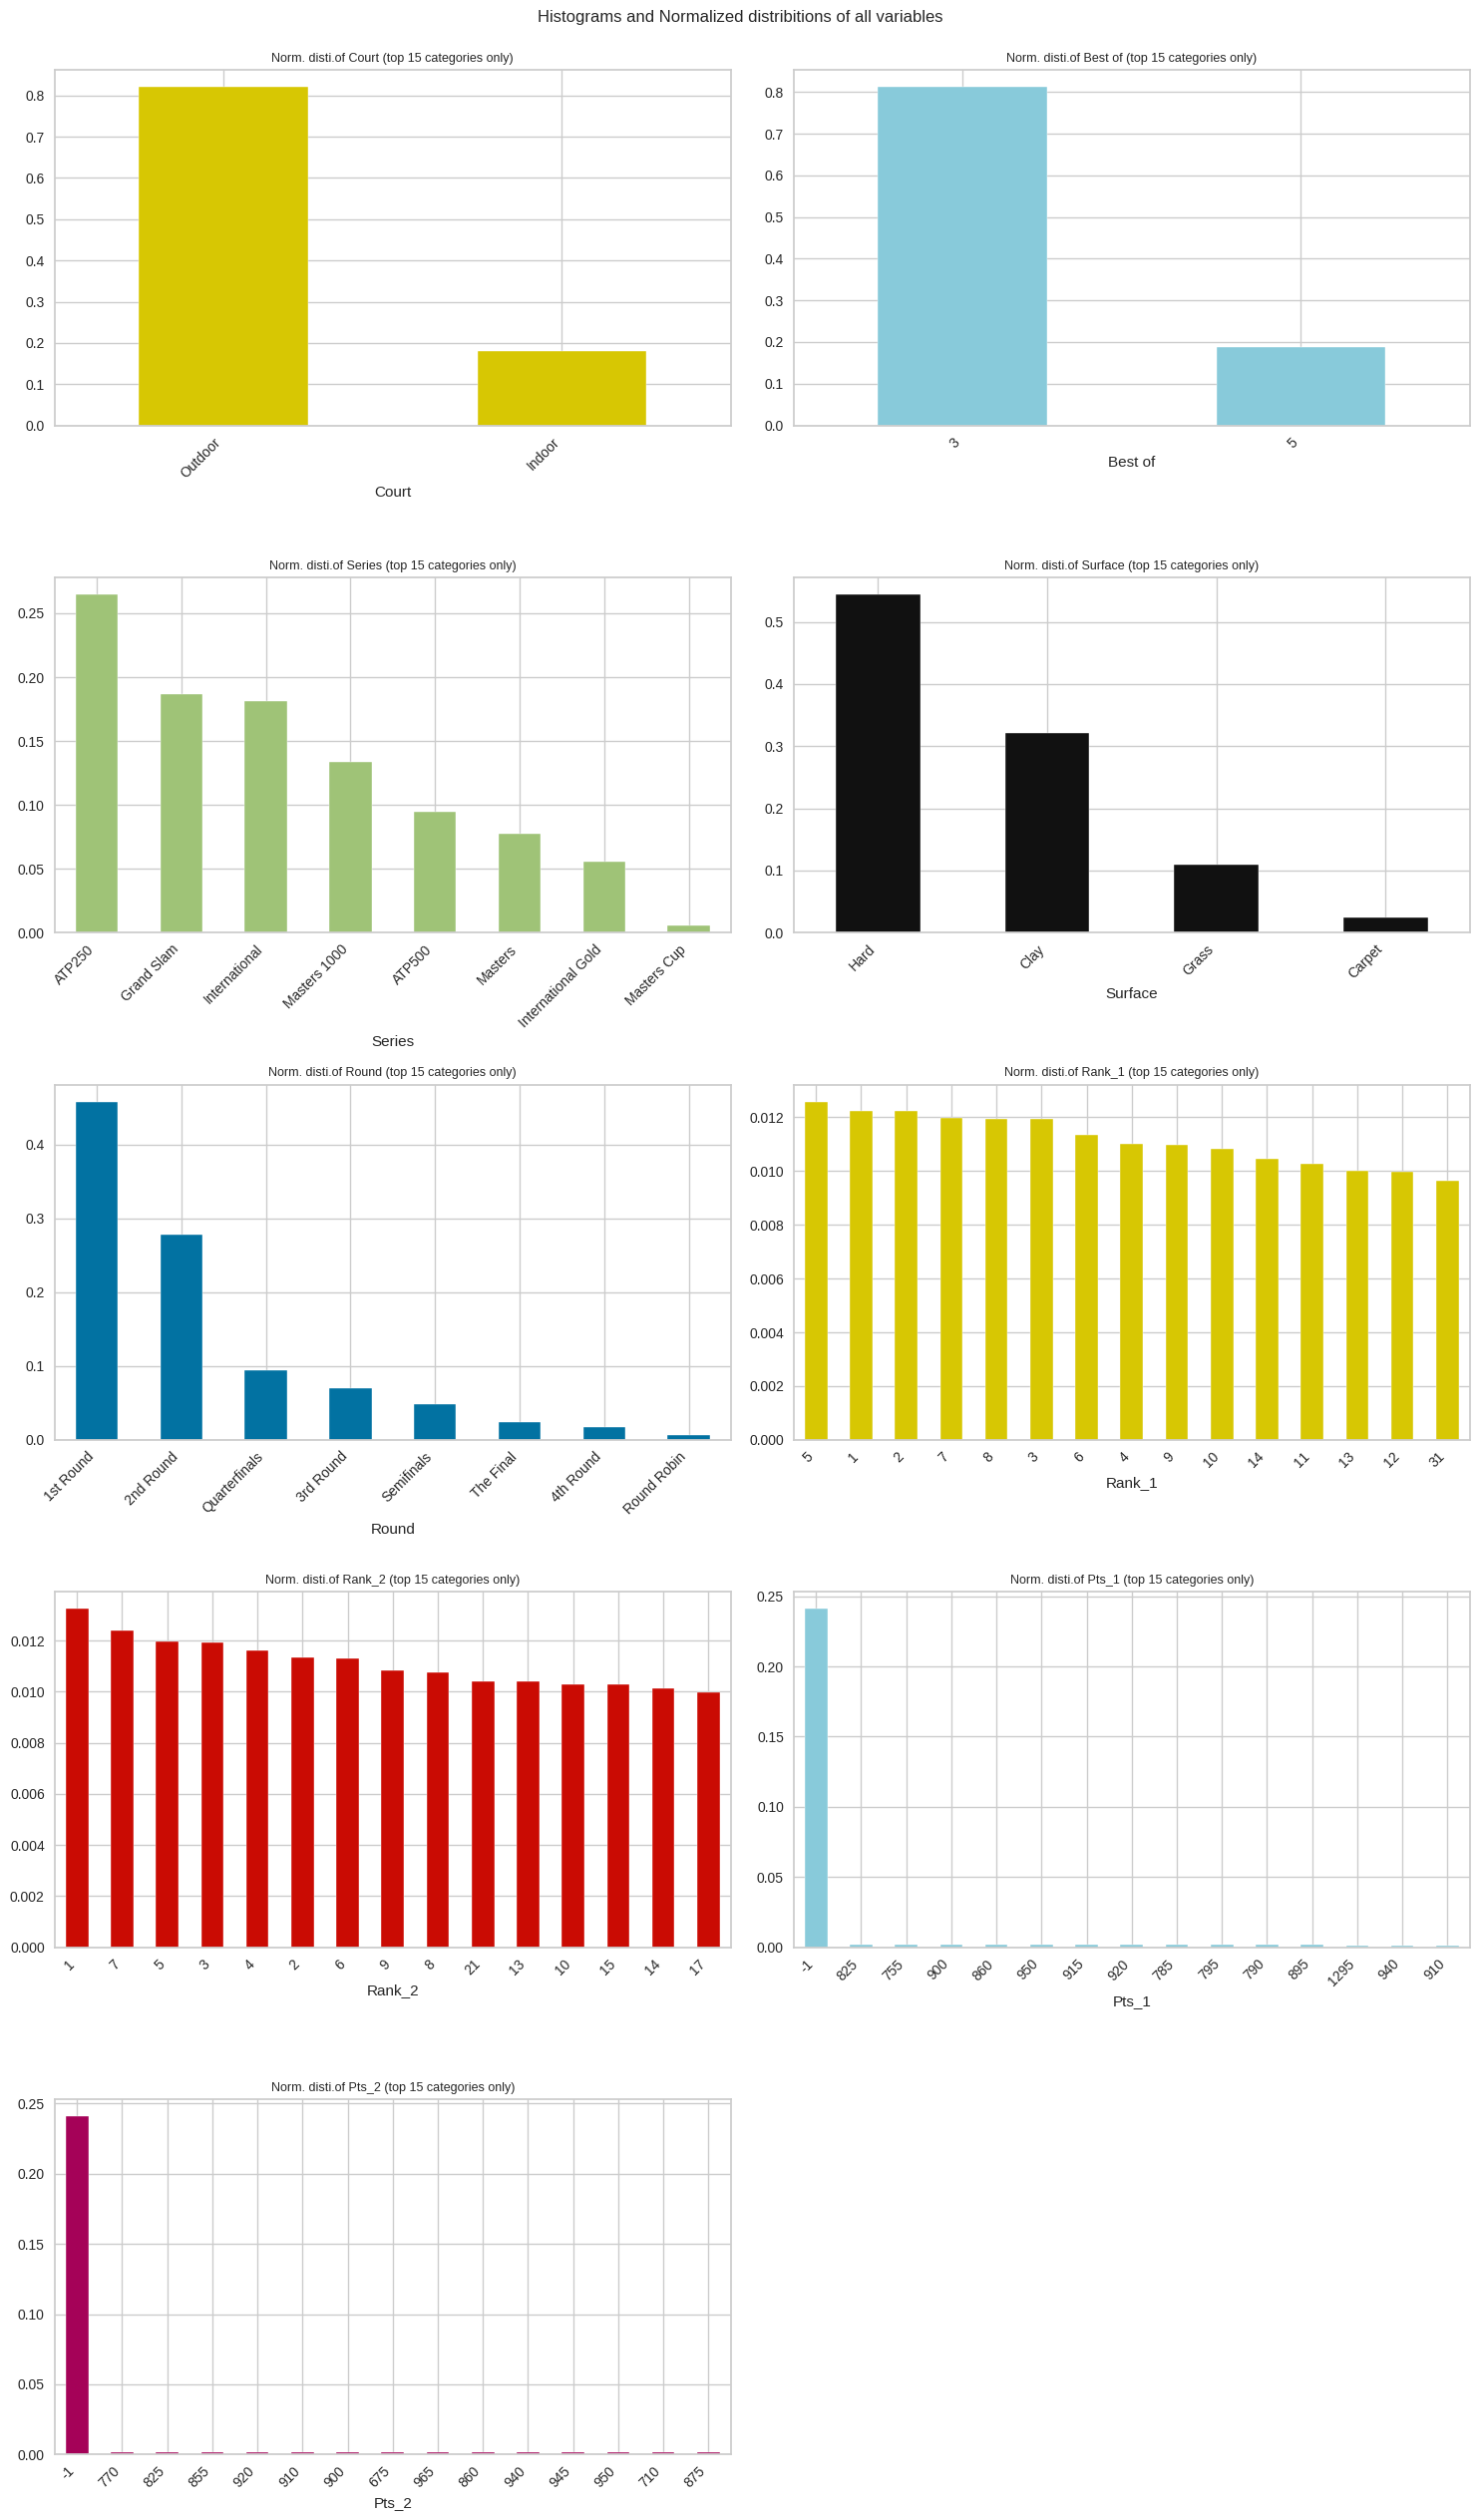

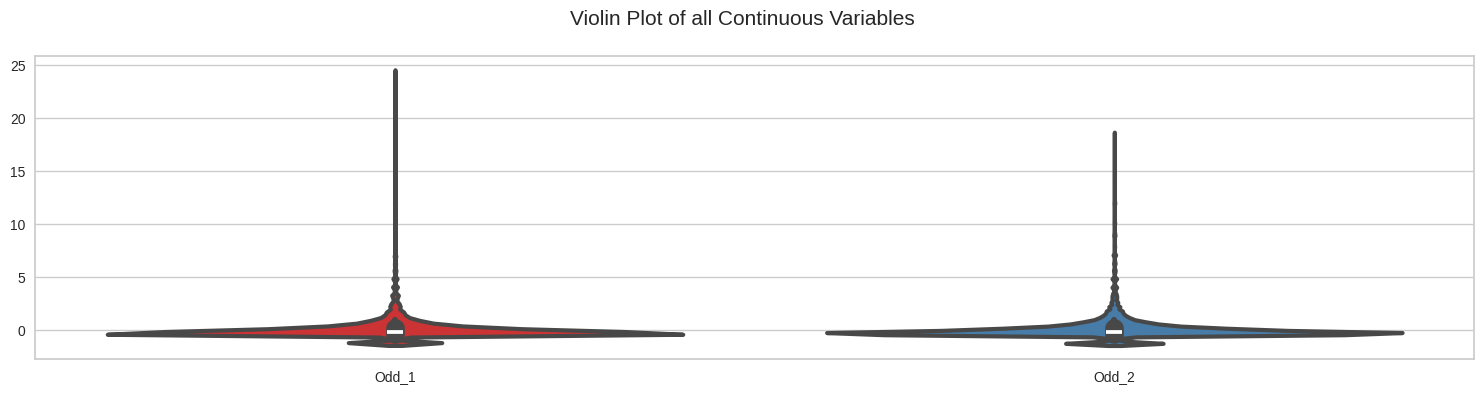

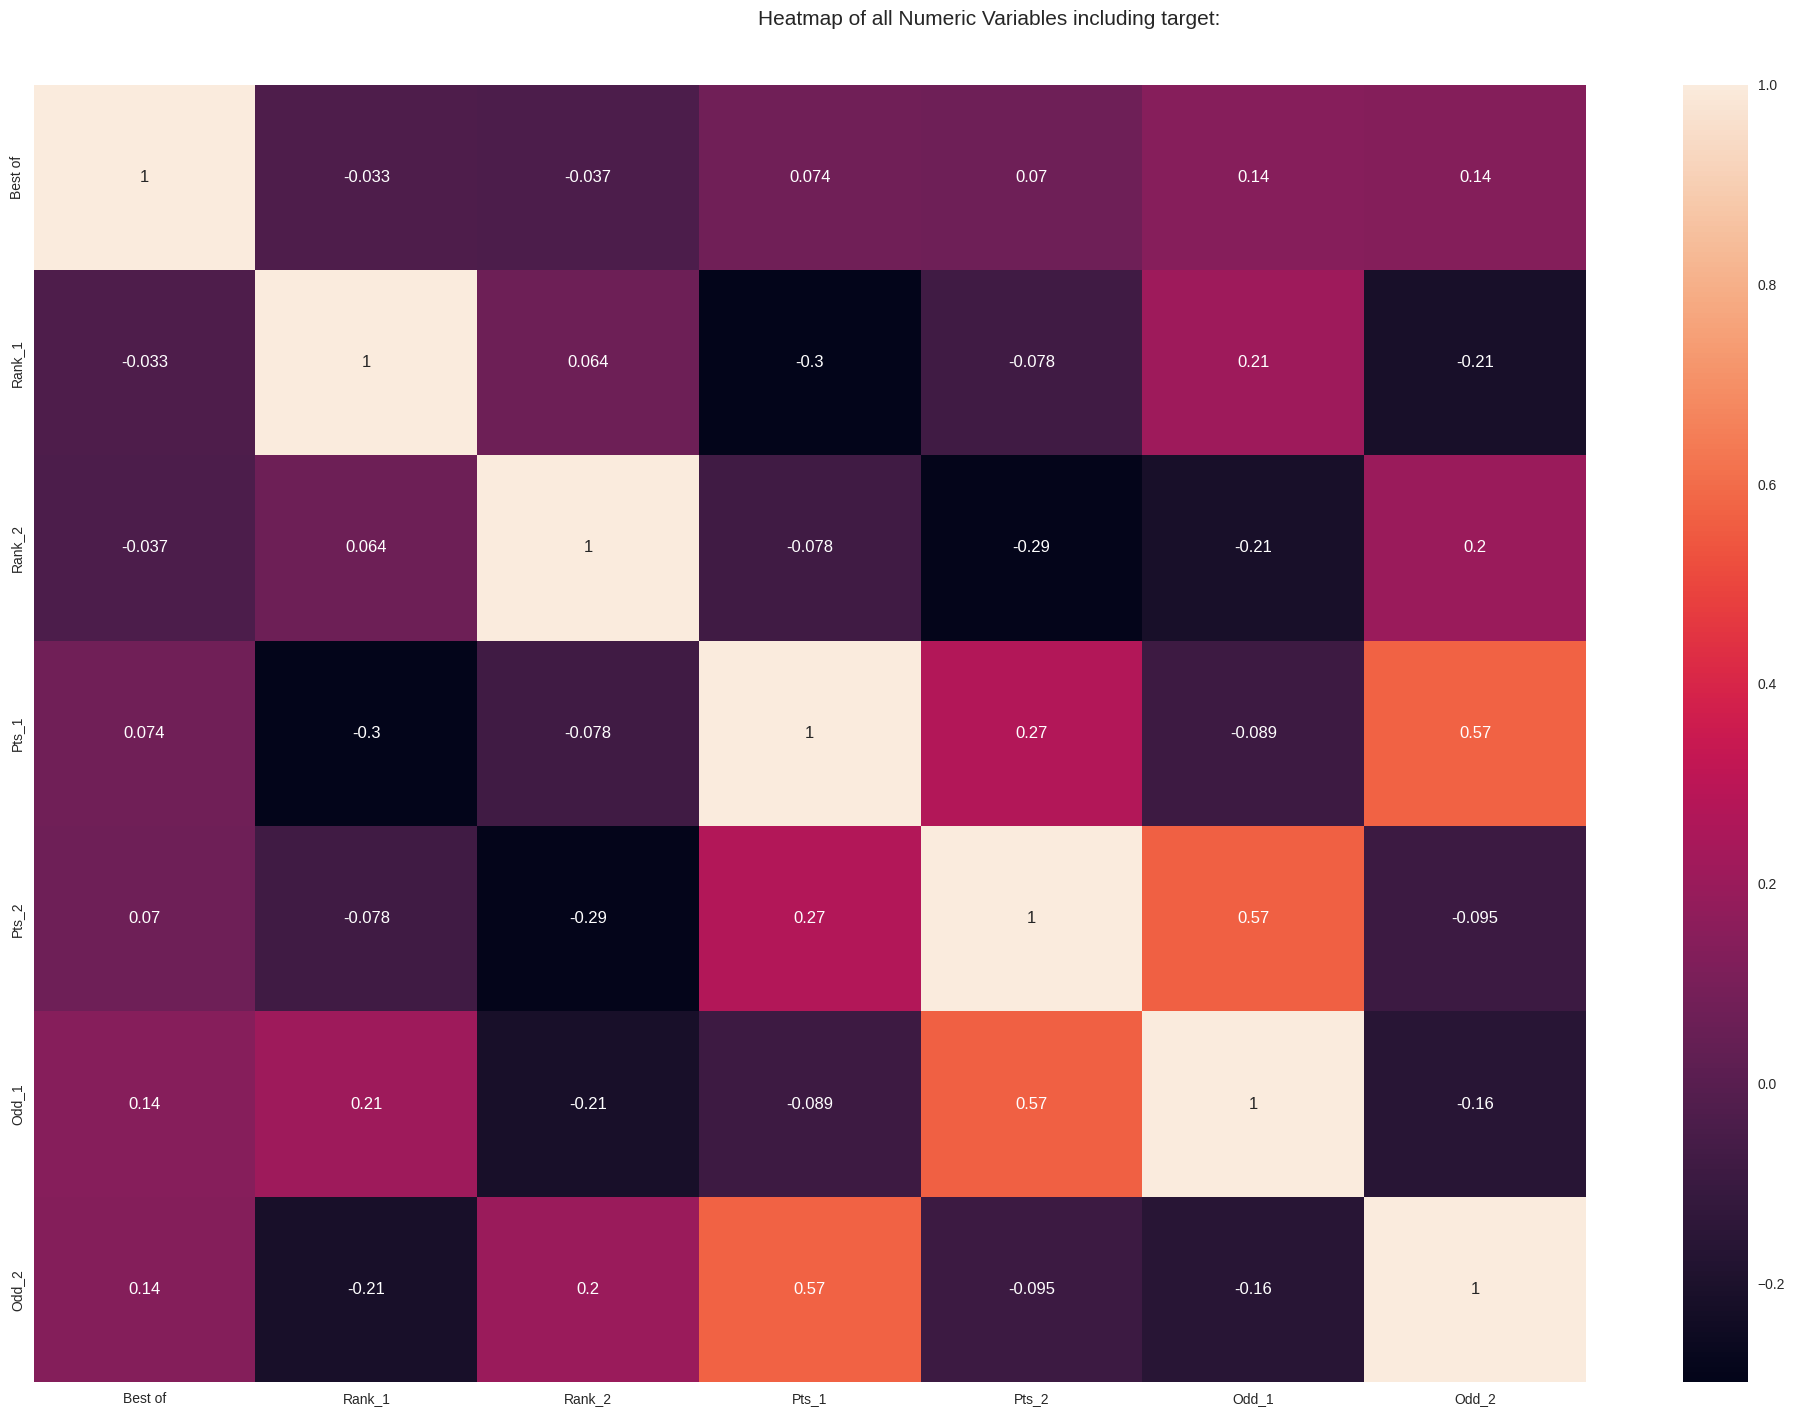

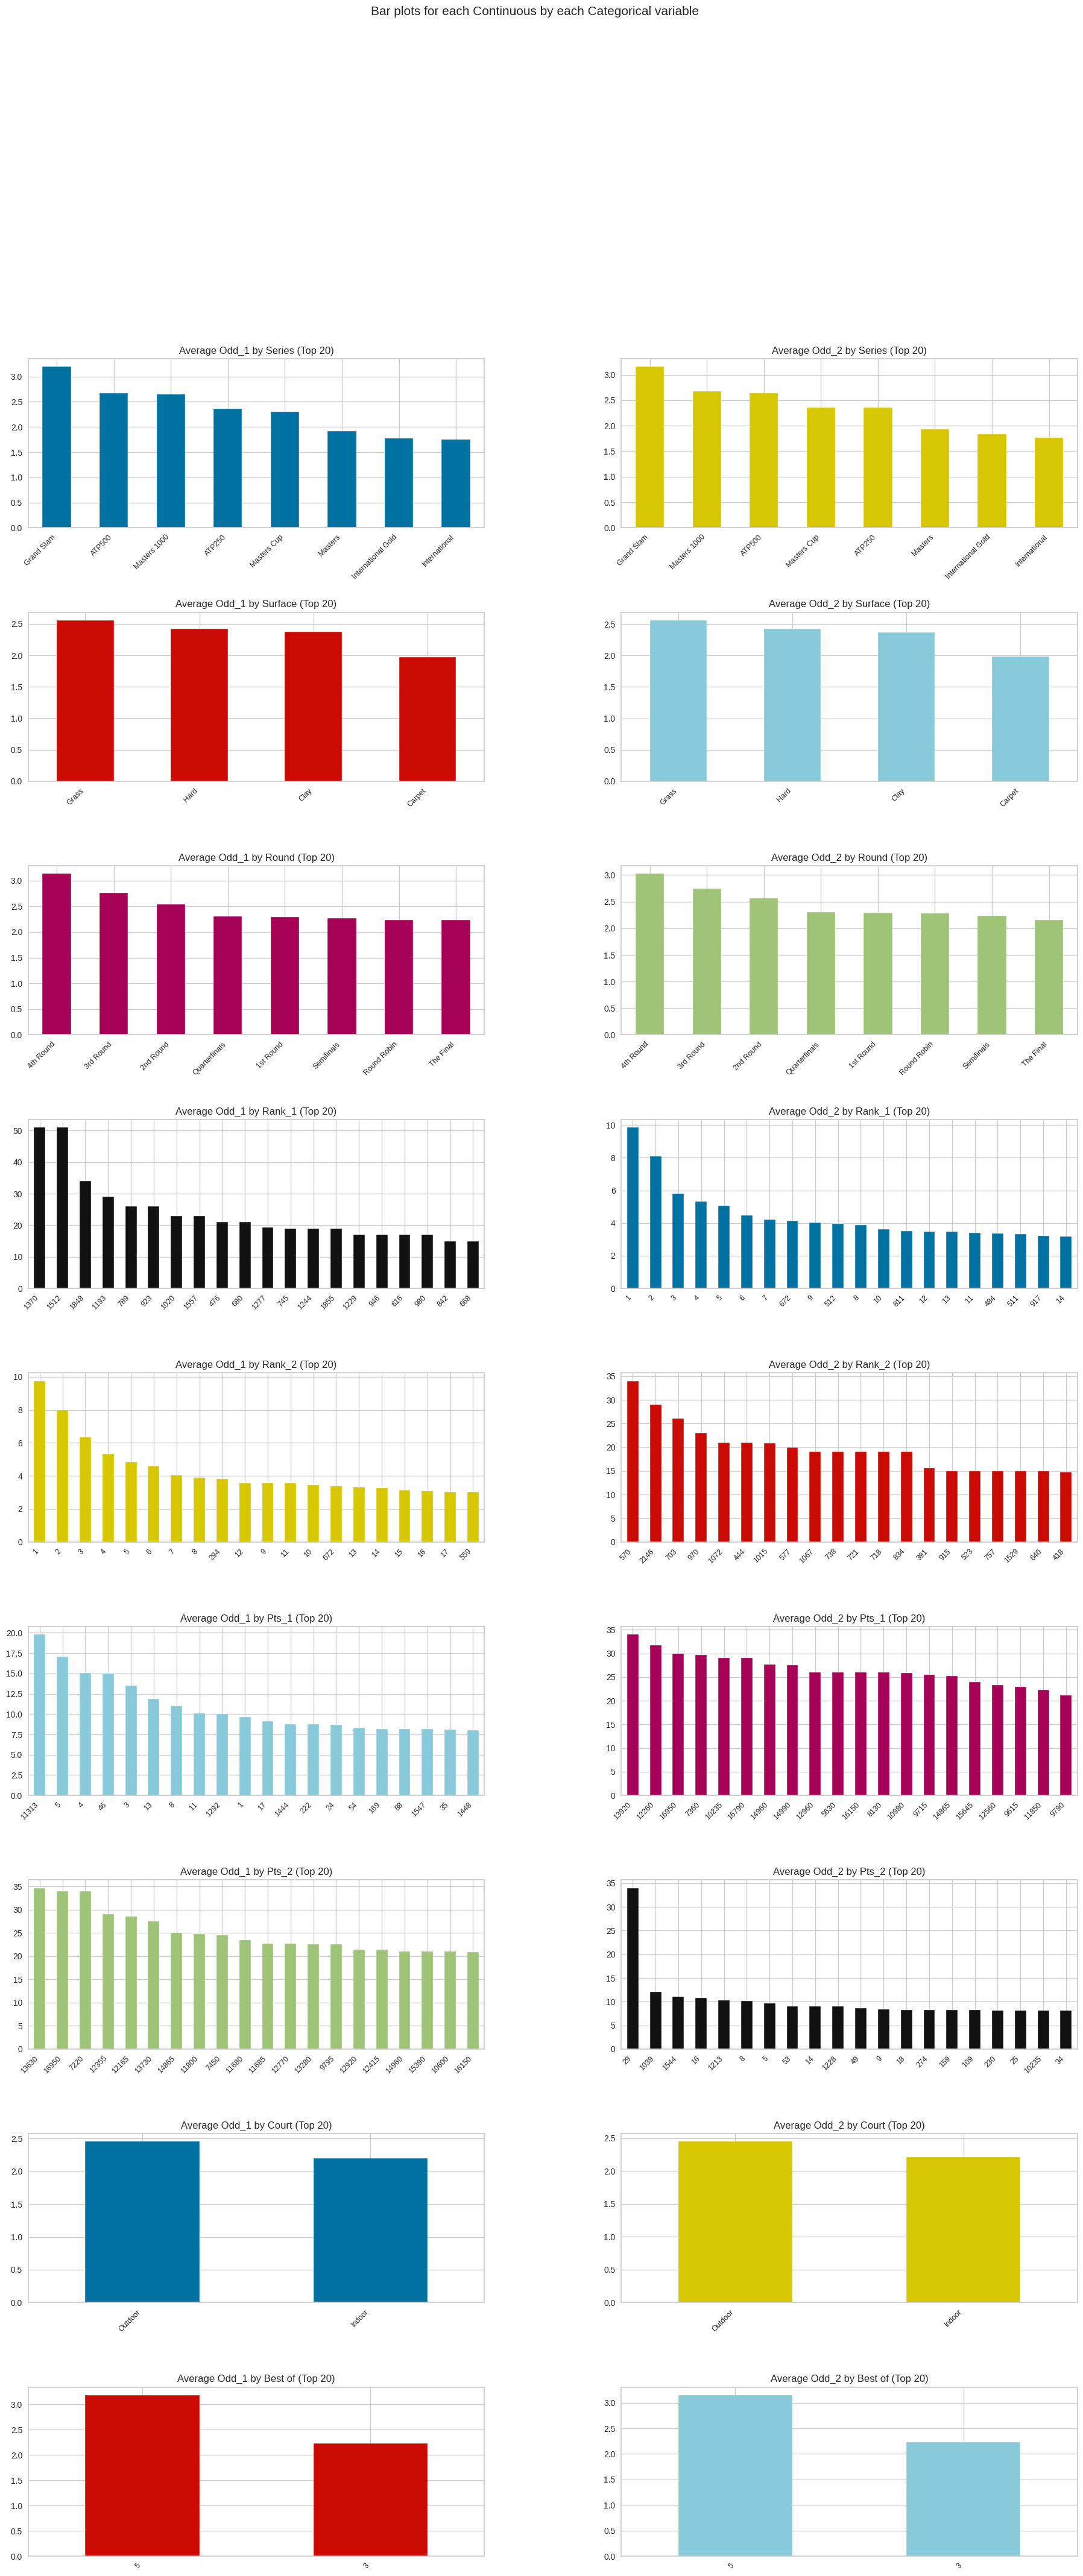

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

Could not draw wordcloud plot for Date. 
Looks like you are missing some required data for this feature.

To download the necessary data, simply run

    python -m textblob.download_corpora

or use the NLTK downloader to download the missing data: http://nltk.org/data.html
If this doesn't fix the problem, file an issue at https://github.com/sloria/TextBlob/issues.

Could not draw wordcloud plot for Player_1. 
Looks like you are missing some required data for this feature.

To download the necessary data, simply run

    python -m textblob.download_corpora

or use the NLTK downloader to download the missing data: http://nltk.org/data.html
If this doesn't fix the problem, file an issue at https://github.com/sloria/TextBlob/issues.

Could not draw wordcloud plot for Player_2. 
Looks like you are missing some required data for this feature.

To download the necessary data, simply run

    python -m textblob.download_corpora

or use the NLTK downloader to download the missing data: http://n

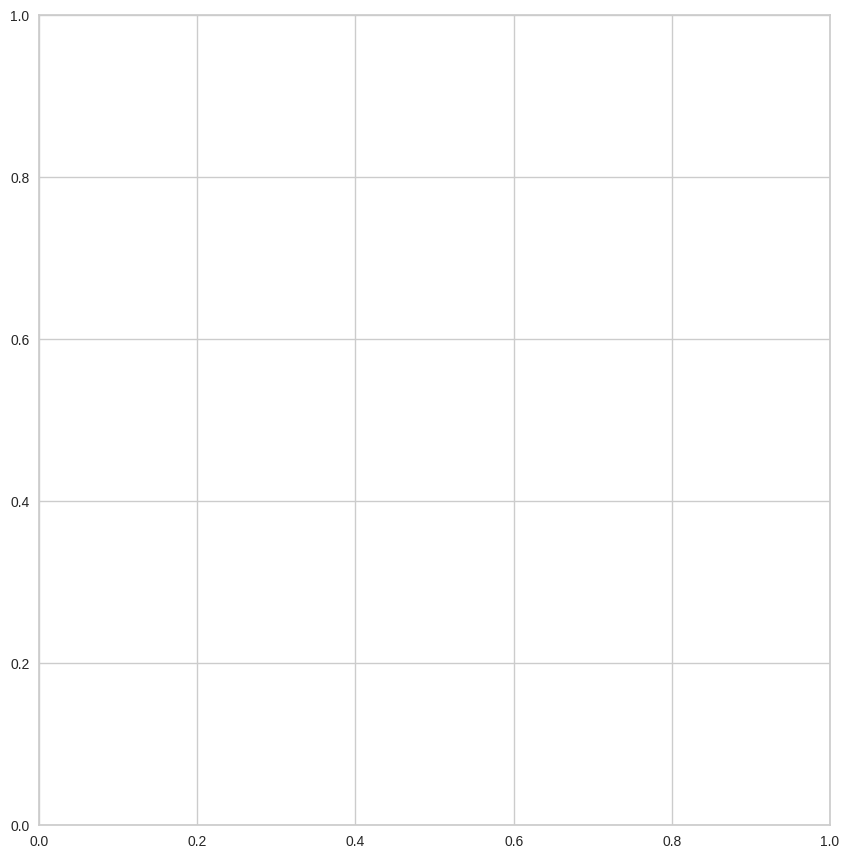

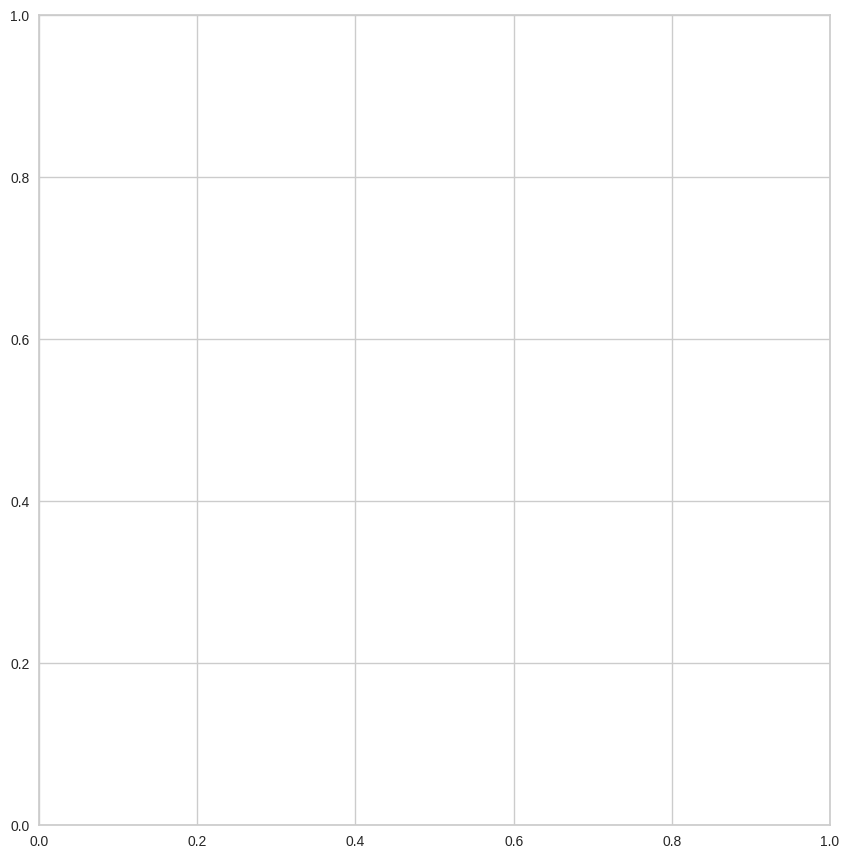

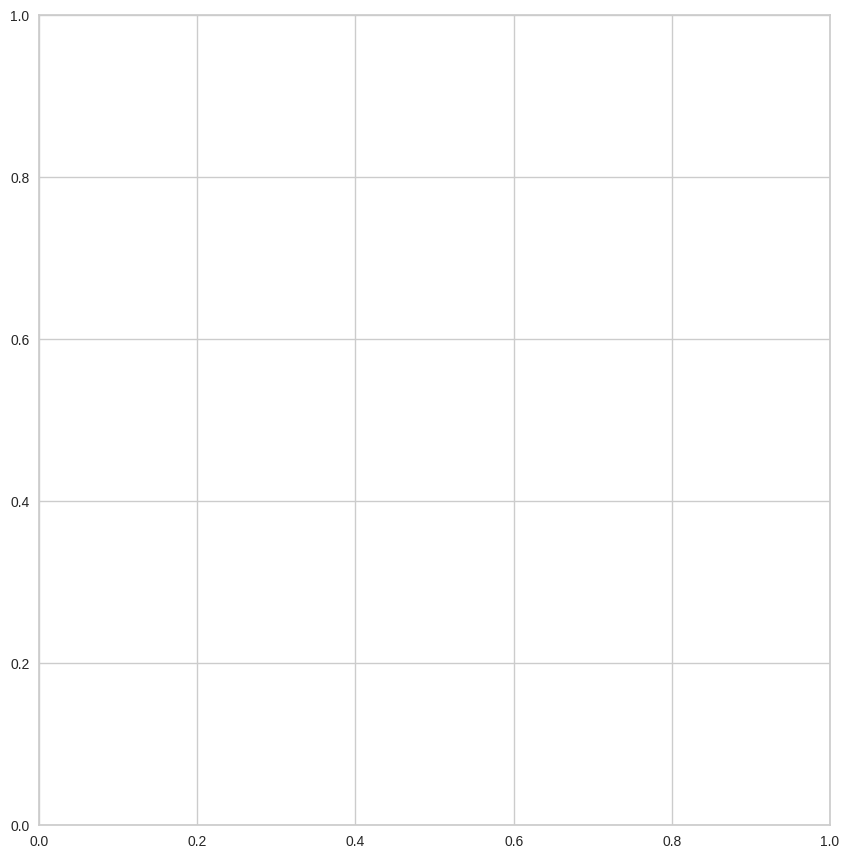

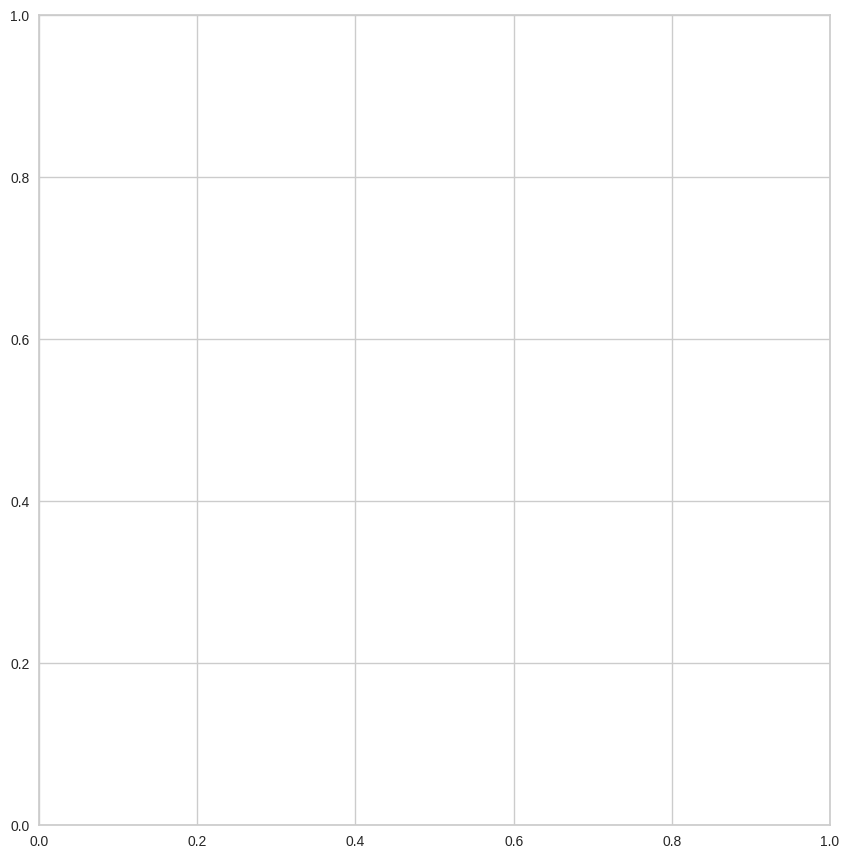

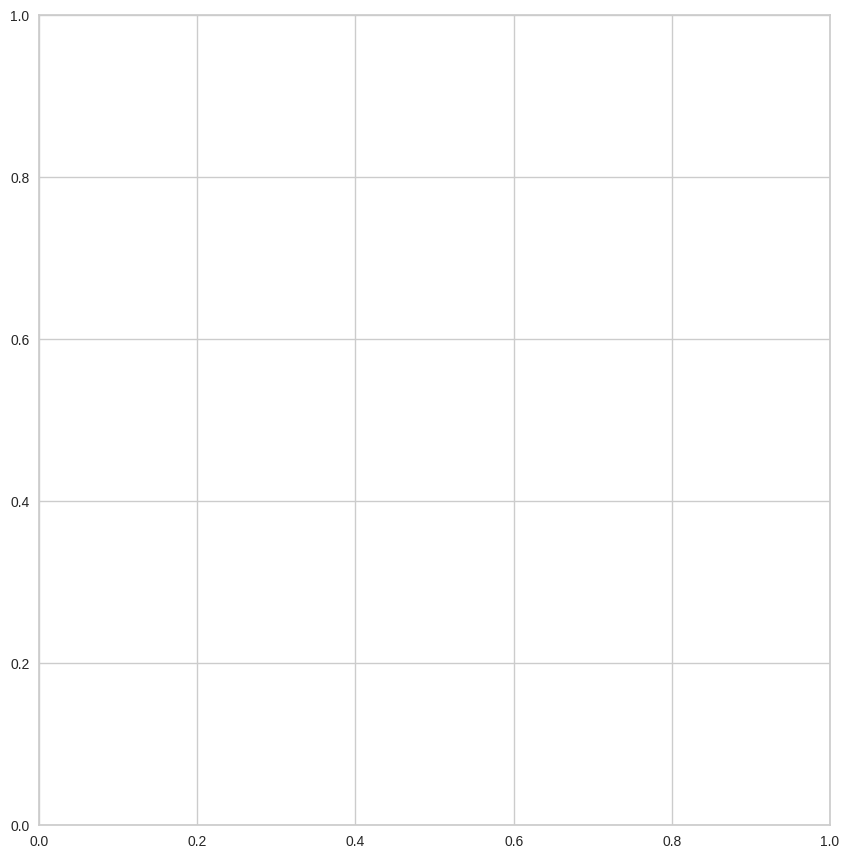

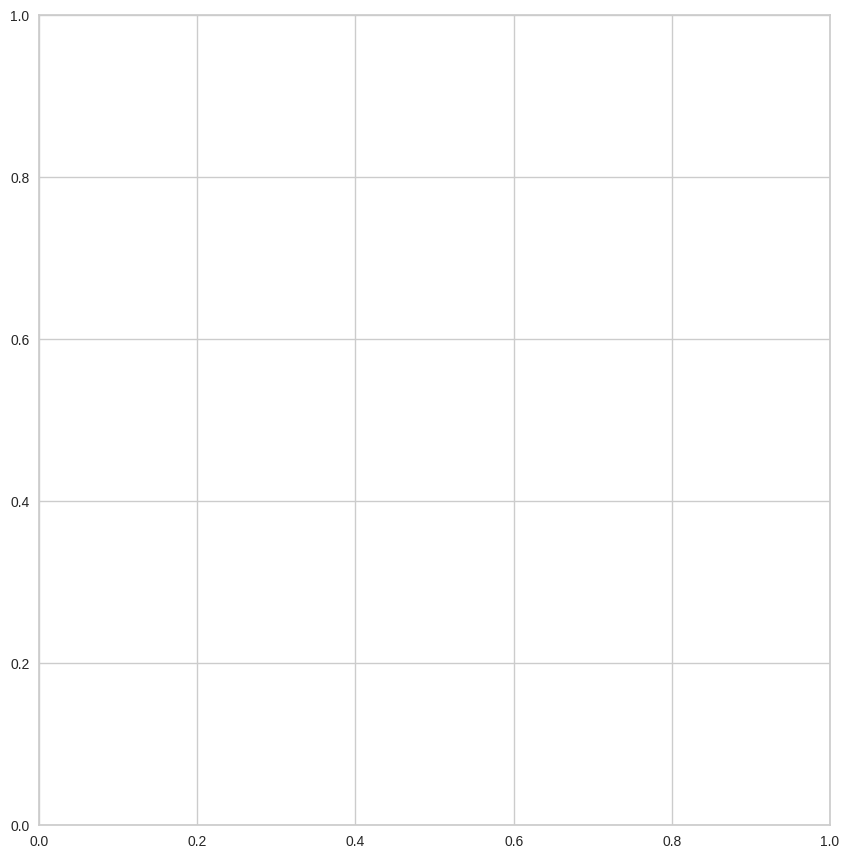

In [6]:
# AutoViz visualization
AV = AutoViz_Class()
auto_viz = AV.AutoViz(url)

# Prepare Data

In [7]:
# Drop columns with many missing values or irrelevant
df_clean = df.drop(columns=['Tournament', 'Date', 'Series', 'Court', 'Surface', 'Round', 'Best of', 'Score'])
# Fill missing values
df_clean['Rank_1'] = df_clean['Rank_1'].fillna(df_clean['Rank_1'].median())
df_clean['Rank_2'] = df_clean['Rank_2'].fillna(df_clean['Rank_2'].median())
df_clean['Pts_1'] = df_clean['Pts_1'].fillna(df_clean['Pts_1'].median())
df_clean['Pts_2'] = df_clean['Pts_2'].fillna(df_clean['Pts_2'].median())
df_clean.dropna(inplace=True)
df_clean.head()

,Player_1,Player_2,Winner,Rank_1,Rank_2,Pts_1,Pts_2,Odd_1,Odd_2
0,Dosedel S.,Ljubicic I.,Dosedel S.,63,77,-1,-1,-1.0,-1.0
1,Clement A.,Enqvist T.,Enqvist T.,56,5,-1,-1,-1.0,-1.0
2,Escude N.,Baccanello P.,Escude N.,40,655,-1,-1,-1.0,-1.0
3,Knippschild J.,Federer R.,Federer R.,87,65,-1,-1,-1.0,-1.0
4,Fromberg R.,Woodbridge T.,Fromberg R.,81,198,-1,-1,-1.0,-1.0


In [8]:
df_clean['Winner'].value_counts()

,count
Winner,
Federer R.,1151
Djokovic N.,1032
Nadal R.,1007
Ferrer D.,677
Murray A.,670
...,...
Mecir M.,1
Langer N.,1
Trifu G.,1


In [9]:
# Count the occurrences of each winner
winner_counts = df_clean['Winner'].value_counts()

# Keep only top 20 most frequent winners
top_winners = df_clean['Winner'].value_counts().nlargest(20).index
df_top = df_clean[df_clean['Winner'].isin(top_winners)]

# Check the filtered data
df_top['Winner'].value_counts()

,count
Winner,
Federer R.,1151
Djokovic N.,1032
Nadal R.,1007
Ferrer D.,677
Murray A.,670
Berdych T.,575
Gasquet R.,573
Roddick A.,564
Monfils G.,549


# Model

In [12]:
from pycaret.classification import *

clf1 = setup(data=df_top, target='Winner', session_id=123,)

# Compare models
top_models = compare_models(include=['lr', 'dt', 'rf', 'nb'], n_select=3)

,Description,Value
0,Session id,123
1,Target,Winner
2,Target type,Multiclass
3,Target mapping,"Berdych T.: 0, Cilic M.: 1, Davydenko N.: 2, Dimitrov G.: 3, Djokovic N.: 4, Federer R.: 5, Ferrer D.: 6, Gasquet R.: 7, Hewitt L.: 8, Isner J.: 9, Lopez F.: 10, Monfils G.: 11, Murray A.: 12, Nadal R.: 13, Robredo T.: 14, Roddick A.: 15, Simon G.: 16, Verdasco F.: 17, Wawrinka S.: 18, Youzhny M.: 19"
4,Original data shape,"(12148, 9)"
5,Transformed data shape,"(12148, 9)"
6,Transformed train set shape,"(8503, 9)"
7,Transformed test set shape,"(3645, 9)"
8,Numeric features,6
9,Categorical features,2


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9180,0.9928,0.9180,0.9202,0.9178,0.9132,0.9133,1.0910
dt,Decision Tree Classifier,0.9129,0.9540,0.9129,0.9151,0.9128,0.9077,0.9079,0.1030
nb,Naive Bayes,0.3877,0.8871,0.3877,0.4001,0.3726,0.3530,0.3550,0.0830
lr,Logistic Regression,0.1828,0.0000,0.1828,0.1456,0.1382,0.1278,0.1321,3.0710


Processing:   0%|          | 0/23 [00:00<?, ?it/s]

# Evaluate

In [13]:
# Create and evaluate a Random Forest model
rf_model = create_model('rf')
evaluate_model(rf_model)
predict_model(rf_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9154,0.9907,0.9154,0.9163,0.9143,0.9103,0.9105
1,0.9107,0.9908,0.9107,0.9138,0.9102,0.9054,0.9056
2,0.9177,0.9919,0.9177,0.9189,0.9175,0.9129,0.9130
3,0.9294,0.9938,0.9294,0.9329,0.9296,0.9253,0.9254
4,0.9200,0.9935,0.9200,0.9228,0.9201,0.9153,0.9154
5,0.9141,0.9920,0.9141,0.9150,0.9133,0.9090,0.9092
6,0.9188,0.9949,0.9188,0.9207,0.9188,0.9140,0.9141
7,0.9035,0.9915,0.9035,0.9067,0.9035,0.8978,0.8979
8,0.9212,0.9958,0.9212,0.9241,0.9212,0.9165,0.9167


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9309,0.9937,0.9309,0.9314,0.9306,0.9268,0.9268


,Player_1,Player_2,Rank_1,Rank_2,Pts_1,Pts_2,Odd_1,Odd_2,Winner,prediction_label,prediction_score
15171,Beck K.,Youzhny M.,41,24,-1,-1,2.62,1.44,Youzhny M.,Youzhny M.,0.81
14284,Hewitt L.,Chela J.I.,3,24,-1,-1,1.12,5.50,Hewitt L.,Hewitt L.,0.80
38069,Murray A.,Cilic M.,6,37,4795,1085,1.50,2.50,Cilic M.,Murray A.,0.18
61987,Van De Zandschulp B.,Monfils G.,70,68,810,837,2.20,1.67,Monfils G.,Monfils G.,0.50
57538,Gasquet R.,Majchrzak K.,75,81,808,762,1.72,2.10,Gasquet R.,Gasquet R.,0.63
...,...,...,...,...,...,...,...,...,...,...,...
32898,Djokovic N.,Hewitt L.,1,181,13630,265,1.01,21.00,Djokovic N.,Djokovic N.,0.88
60009,Ivashka I.,Wawrinka S.,73,84,741,717,2.63,1.50,Wawrinka S.,Wawrinka S.,0.78
38761,Sela D.,Davydenko N.,110,100,531,590,3.50,1.28,Davydenko N.,Davydenko N.,0.55
16502,Davydenko N.,Llodra M.,7,111,2175,383,1.25,3.75,Davydenko N.,Davydenko N.,0.83


# Tune, Best Model

In [ ]:
tuned_rf = tune_model(rf_model)
final_rf = finalize_model(tuned_rf)
save_model(final_rf, 'final_rf_model')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,18:08:15
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Classifier


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


# References

- Tennis dataset from Kaggle: https://www.kaggle.com/datasets/dissfya/atp-tennis-2000-2023daily-pull
- PyCaret Documentation: https://pycaret.gitbook.io/docs/
- AutoViz GitHub: https://github.com/AutoViML/AutoViz